<a href="https://colab.research.google.com/github/AlShekly/AI-Driven-Roof-Damage-Analysis/blob/main/Roof%20Damage%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
('Region D', 77, 2.5133951161443076, 35, 'Shingle', 1)
('Region E', 56, 0.25739375624994676, 39, 'Tile', 0)
('Region C', 122, 1.3932323211830573, 37, 'Tile', 1)
('Region E', 121, 4.541329429833269, 25, 'Metal', 1)
('Region E', 61, 1.197809453334862, 36, 'Tile', 0)

Summary Statistics:
       Wind_Speed_kmh  Hail_Size_cm  Roof_Age_years  Damage_Risk
count      100.000000    100.000000      100.000000   100.000000
mean        98.680000      2.486012       28.380000     0.780000
std         29.547045      1.467868       13.020404     0.416333
min         50.000000      0.025308        5.000000     0.000000
25%         76.750000      1.195404       19.000000     1.000000
50%        100.000000      2.663563       29.000000     1.000000
75%        122.500000      3.616640       38.250000     1.000000
max        148.000000      4.928252       49.000000     1.000000


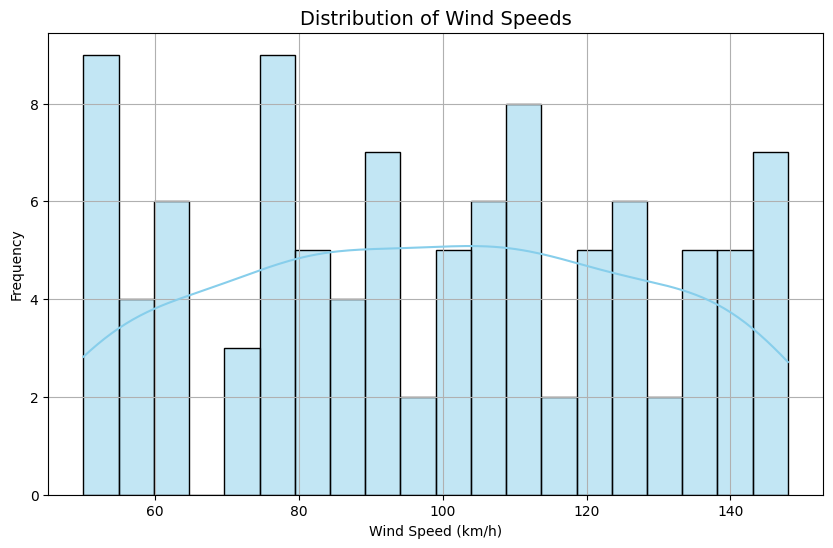

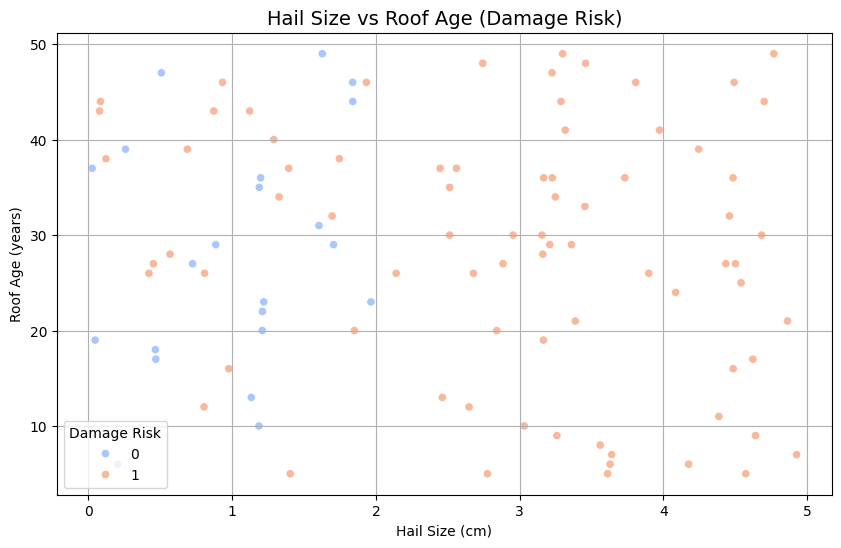

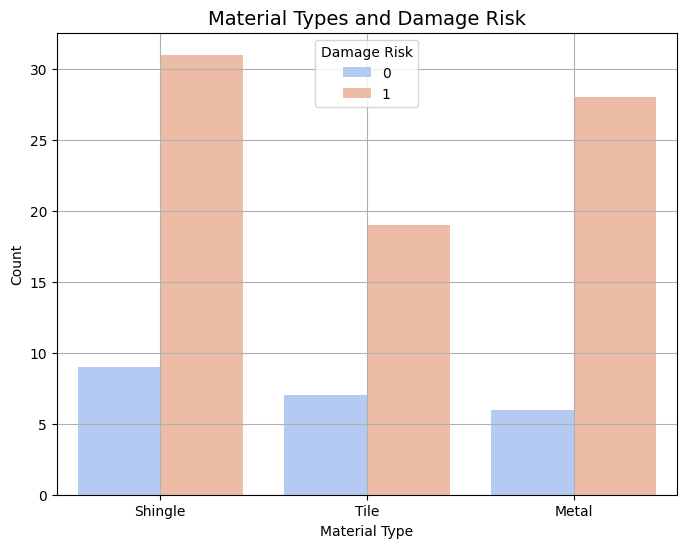


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.92      1.00      0.96        23

    accuracy                           0.93        30
   macro avg       0.96      0.86      0.90        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix:
[[ 5  2]
 [ 0 23]]

Feature Importance:
Hail_Size_cm      0.518387
Wind_Speed_kmh    0.365962
Roof_Age_years    0.115651
dtype: float64


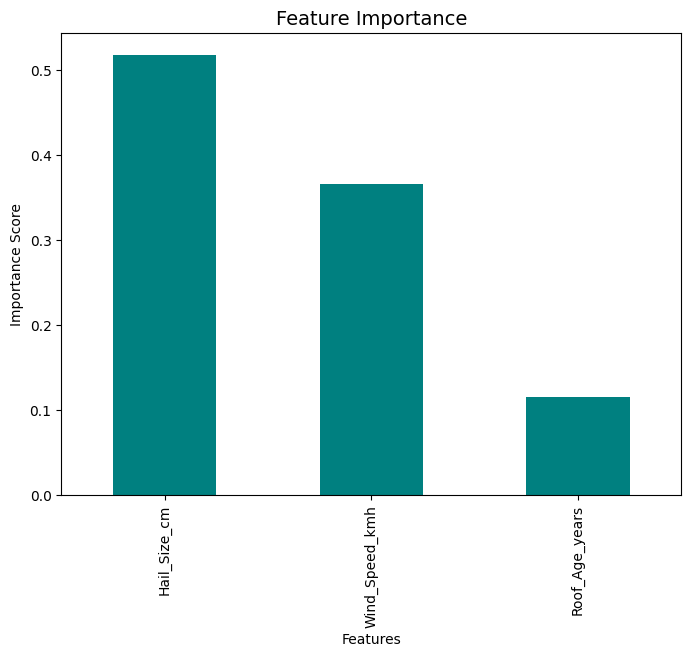

In [2]:


# Step 1: Simulating a Sample Dataset and Storing it in SQLite
import sqlite3
import pandas as pd
import numpy as np

# Create a SQLite database
conn = sqlite3.connect("roof_damage_analysis.db")
cursor = conn.cursor()

# Generate synthetic data
np.random.seed(42)
data = {
    "Region": np.random.choice(["Region A", "Region B", "Region C", "Region D", "Region E"], 100),
    "Wind_Speed_kmh": np.random.randint(50, 150, 100),
    "Hail_Size_cm": np.random.uniform(0, 5, 100),
    "Roof_Age_years": np.random.randint(5, 50, 100),
    "Material_Type": np.random.choice(["Shingle", "Metal", "Tile"], 100),
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a synthetic "Damage_Risk" column
df["Damage_Risk"] = (df["Wind_Speed_kmh"] > 100) | (df["Hail_Size_cm"] > 2)

# Save the DataFrame to SQLite
df.to_sql("roof_data", conn, if_exists="replace", index=False)

# Verify data in SQLite
cursor.execute("SELECT * FROM roof_data LIMIT 5;")
print("Sample Data:")
for row in cursor.fetchall():
    print(row)

# Step 2: Load Data from SQLite into Python and Analyze
# Load data from SQLite
query = "SELECT * FROM roof_data;"
data = pd.read_sql(query, conn)

# Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(data.describe())

# Step 3: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Wind Speeds
plt.figure(figsize=(10, 6))
sns.histplot(data["Wind_Speed_kmh"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Wind Speeds", fontsize=14)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Hail Size vs Roof Age (colored by Damage Risk)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, x="Hail_Size_cm", y="Roof_Age_years", hue="Damage_Risk", palette="coolwarm"
)
plt.title("Hail Size vs Roof Age (Damage Risk)", fontsize=14)
plt.xlabel("Hail Size (cm)")
plt.ylabel("Roof Age (years)")
plt.grid(True)
plt.legend(title="Damage Risk")
plt.show()

# Count of Material Types
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Material_Type", hue="Damage_Risk", palette="coolwarm")
plt.title("Material Types and Damage Risk", fontsize=14)
plt.xlabel("Material Type")
plt.ylabel("Count")
plt.grid(True)
plt.legend(title="Damage Risk")
plt.show()

# Step 4: AI Analysis (Using a Simple Model)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data for modeling
X = data[["Wind_Speed_kmh", "Hail_Size_cm", "Roof_Age_years"]]
X = pd.get_dummies(data=X, drop_first=True)
y = data["Damage_Risk"].astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 5: Action Plan Based on AI Insights
# Feature importance analysis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)

print("\nFeature Importance:")
print(importances)

# Visualization of Feature Importances
plt.figure(figsize=(8, 6))
importances.plot(kind="bar", color="teal")
plt.title("Feature Importance", fontsize=14)
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# Insights and Actions:
# - Regions with high wind speeds and large hail sizes should be prioritized for inspections.
# - Older roofs (above 30 years) are significantly more vulnerable and should be targeted first.
# - Roofing materials like Shingles show higher risk; focus on marketing replacements for these.

conn.close()
